# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = 'https://api.openweathermap.org/data/2.5/weather?q=' + city + '&appid='+ weather_api_key

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | yangor
City not found. Skipping...
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | san luis de la loma
Processing Record 7 of Set 1 | sisimiut
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | aasiaat
Processing Record 13 of Set 1 | fort st. john
Processing Record 14 of Set 1 | dudinka
Processing Record 15 of Set 1 | dongola
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | qamdo
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | benguela
Processing Record 21 of Set 1 | envira
Processing

In [77]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [78]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,udachny,66.4167,112.4000,288.02,54,16,3.49,RU,1722797922
1,port-aux-francais,-49.3500,70.2167,275.00,67,31,10.04,TF,1722797924
2,iqaluit,63.7506,-68.5145,279.00,93,100,2.06,CA,1722797926
3,san luis de la loma,17.2706,-100.8939,304.04,62,75,4.11,MX,1722797927
4,sisimiut,66.9395,-53.6735,281.90,76,77,3.70,GL,1722797928


In [79]:
# Export the City_Data into a csv
city_data_df['Max Temp'] = city_data_df['Max Temp']-273.15
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [80]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,14.87,54,16,3.49,RU,1722797922
1,port-aux-francais,-49.3500,70.2167,1.85,67,31,10.04,TF,1722797924
2,iqaluit,63.7506,-68.5145,5.85,93,100,2.06,CA,1722797926
3,san luis de la loma,17.2706,-100.8939,30.89,62,75,4.11,MX,1722797927
4,sisimiut,66.9395,-53.6735,8.75,76,77,3.70,GL,1722797928


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

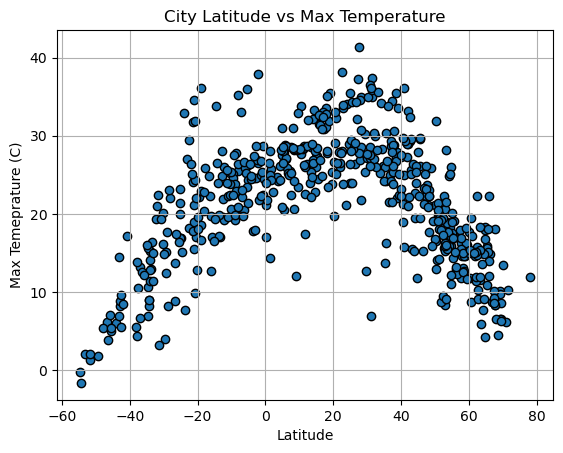

In [81]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temeprature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

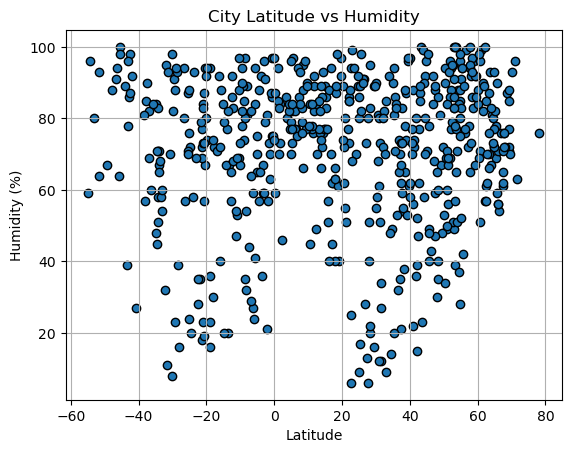

In [56]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

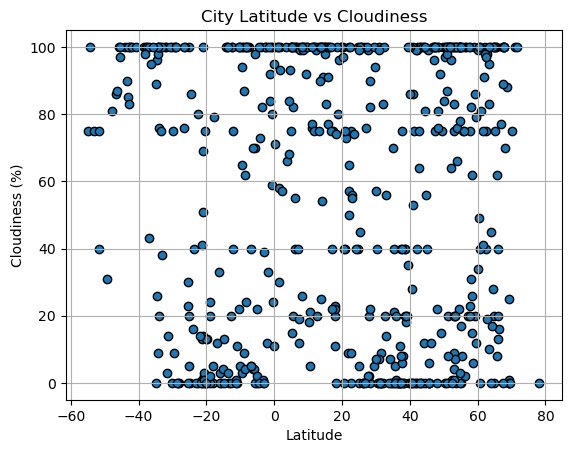

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

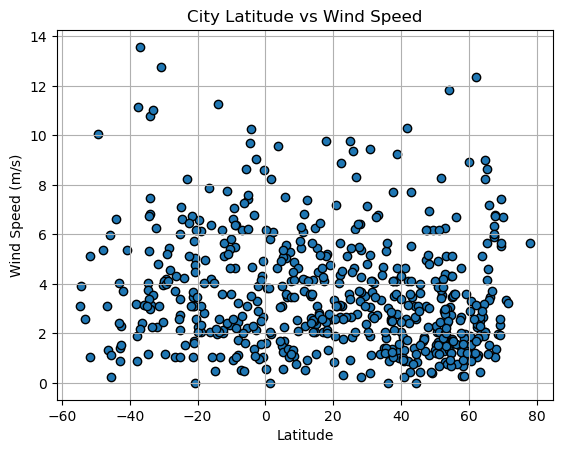

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def regressPlot(x,y,xtitle,ytitle):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
    regressValues = x * slope + intercept
    lineEq = 'y = ' + str(round(slope,2)) + ' x + ' + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regressValues,'r-')
    plt.annotate(lineEq,(10,10),fontsize = 15, color = 'red',xycoords='figure points')
    plt.title(f'{xtitle} vs {ytitle}')
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    print(f"r-squared: {rvalue**2}")
    plt.show()

In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachny,66.4167,112.4000,14.87,54,16,3.49,RU,1722797922
2,iqaluit,63.7506,-68.5145,5.85,93,100,2.06,CA,1722797926
3,san luis de la loma,17.2706,-100.8939,30.89,62,75,4.11,MX,1722797927
4,sisimiut,66.9395,-53.6735,8.75,76,77,3.70,GL,1722797928
7,bethel,41.3712,-73.4140,29.18,72,75,2.57,US,1722797920


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,1.85,67,31,10.04,TF,1722797924
5,grytviken,-54.2811,-36.5092,-1.64,96,100,3.93,GS,1722797929
6,port mathurin,-19.6833,63.4167,22.11,74,13,6.57,MU,1722797714
8,waitangi,-43.9535,-176.5597,6.01,89,100,6.61,NZ,1722797933
13,puerto ayora,-0.7393,-90.3518,24.98,86,80,2.68,EC,1722797702


###  Temperature vs. Latitude Linear Regression Plot

r-squared: 0.4498582858744284


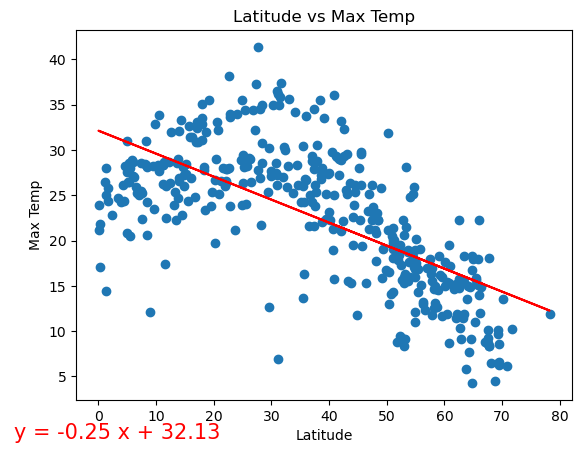

In [84]:
# Linear regression on Northern Hemisphere
regressPlot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude','Max Temp')

r-squared: 0.6211146078620148


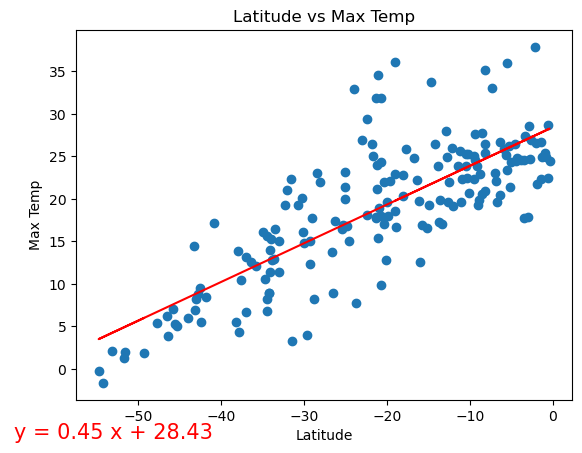

In [63]:
# Linear regression on Southern Hemisphere
regressPlot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max Temp (C)')

**Discussion about the linear relationship:** Latitude describes distance from the equator. In both hemispheres we see a relatively strong correlation that the closer the city is to the equator, the higher its max temperature. This corresponds nicely with what we know about how direct solar exposure at the equator influences temperature compared to around the poles. Additionally, we see higher highs in the north and lower lows in the south, as it is currently the northern Summer and southern Winter (as of August 2024.)

### Humidity vs. Latitude Linear Regression Plot

r-squared: 1.2725729697851381e-06


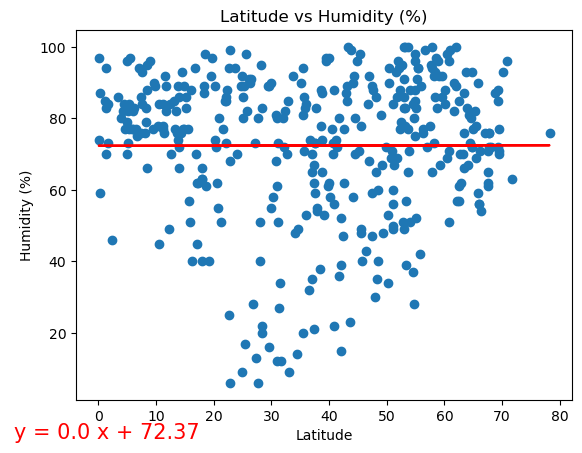

In [64]:
# Northern Hemisphere
regressPlot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity (%)')

r-squared: 0.007518484110519393


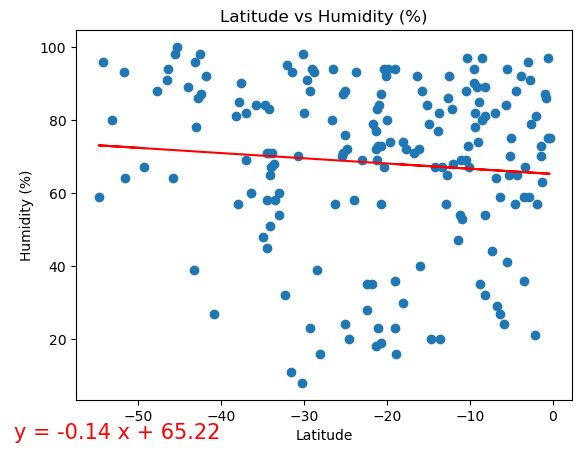

In [65]:
# Southern Hemisphere
regressPlot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','Humidity (%)')

**Discussion about the linear relationship:** Both graphs show weak to no relationship between humdity percent and latitude. Humidity is largely influenced by air movement and nearby warm water sources which can vary vstly across similar latitudinal points.

### Cloudiness vs. Latitude Linear Regression Plot

r-squared: 0.015641100895195464


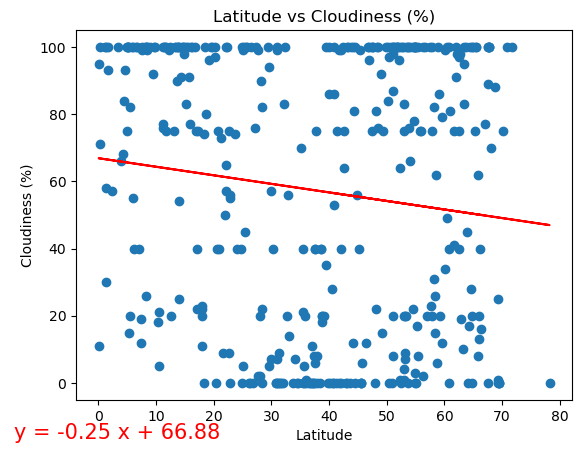

In [66]:
# Northern Hemisphere
regressPlot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)')

r-squared: 0.058846134016471284


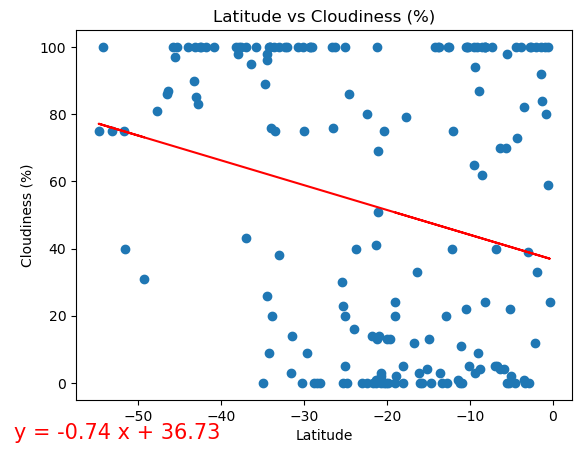

In [67]:
# Southern Hemisphere
regressPlot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)')

**Discussion about the linear relationship:** Both graphs show very weak to no correlation. Notably, we see lots of data points at the extremes of the graph, representing clear weather and overcast weather.

### Wind Speed vs. Latitude Linear Regression Plot

r-squared: 0.007502079898802127


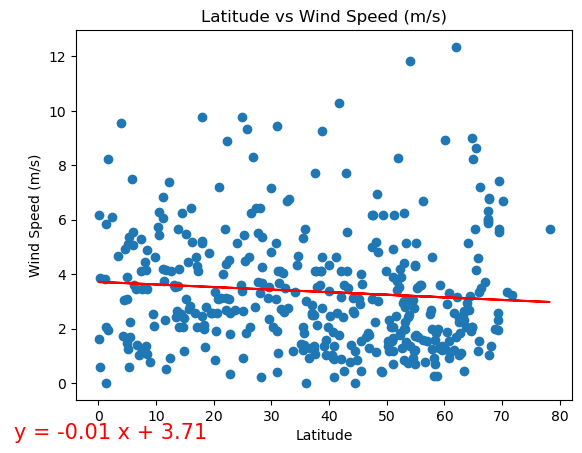

In [69]:
# Northern Hemisphere
regressPlot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed (m/s)')

r-squared: 4.054644553351436e-08


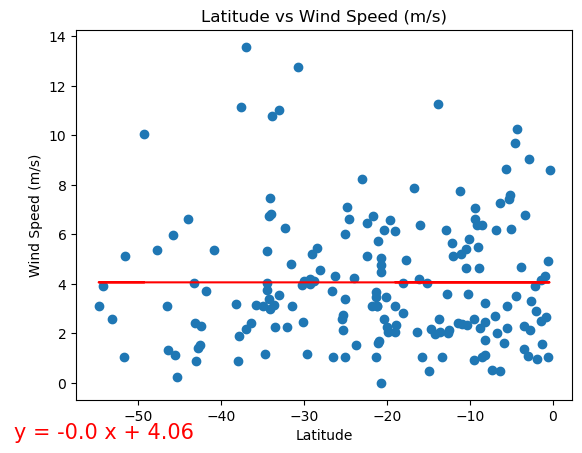

In [70]:
# Southern Hemisphere
regressPlot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind Speed (m/s)')

**Discussion about the linear relationship:** The graphs show very weak to no correlation between latitude and wind speed. wind speed, much like humidity and cloudiness above, are measures of weather patterns that act differently or only effect some parts of the same latitudinal points.